<a href="https://colab.research.google.com/github/ShashiPriya9/CaseStudy-on-Aerofit-Data-Analysis-/blob/main/Project_Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv')
#data shape
print(df.shape)
df.head()


(180, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#data structure
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
#Missing values
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

INSIGHTS: By this isna(), we understood that there are no missing values in this dataset.

In [ ]:
#Non graphical analysis
df.groupby("Gender")["Education"].nunique().sort_values(ascending=False)

Gender
Male      8
Female    6
Name: Education, dtype: int64

INSIGHTS: Male are major part in Education.

In [ ]:
df.groupby('Gender')['MaritalStatus'].value_counts()

Gender  MaritalStatus
Female  Partnered        46
        Single           30
Male    Partnered        61
        Single           43
Name: count, dtype: int64

INSIGHTS: In Marital Status, partnered are more and in that majorily male took place.

In [ ]:
df.groupby('Product')['MaritalStatus'].value_counts()

Product  MaritalStatus
KP281    Partnered        48
         Single           32
KP481    Partnered        36
         Single           24
KP781    Partnered        23
         Single           17
Name: count, dtype: int64

INSIGHTS: By this we understood, Product KP281 has purchased by Partnered customers. It is to be preferred that most of the partnered custonmers are in this. So KP781 product should be updated well to get more purchases.

In [ ]:
df.groupby('Gender')['Product'].value_counts()

Gender  Product
Female  KP281      40
        KP481      29
        KP781       7
Male    KP281      40
        KP781      33
        KP481      31
Name: count, dtype: int64

INSIGHTS: In product category, KP281 has highly purchased by Partnered Female and Male customers. It is preferred to update the other products as well to get more purchases.


In [ ]:
df.groupby('Gender')['Fitness'].value_counts()

Gender  Fitness
Female  3          45
        2          16
        4           8
        5           6
        1           1
Male    3          52
        5          25
        4          16
        2          10
        1           1
Name: count, dtype: int64

INSIGHTS: Male are more in Fitness than in Female.

In [ ]:
#Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


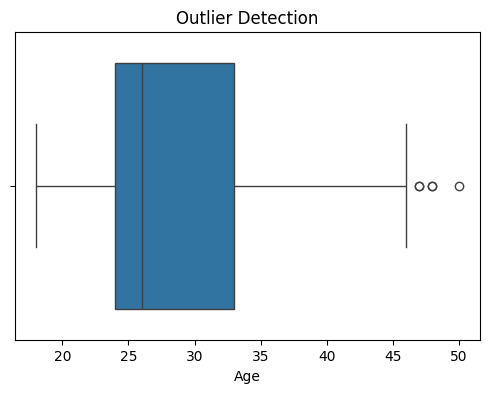

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Age'],orient= 'h')
plt.title('Outlier Detection')

plt.show()

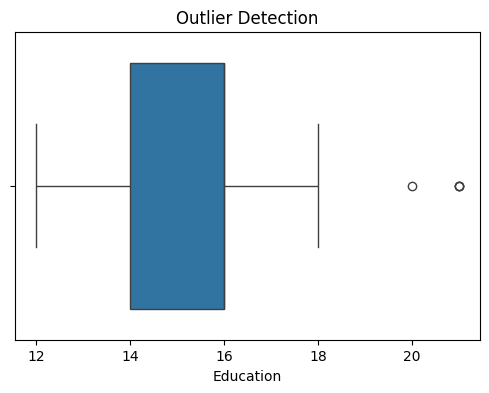

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Education'],orient= 'h')
plt.title('Outlier Detection')

plt.show()

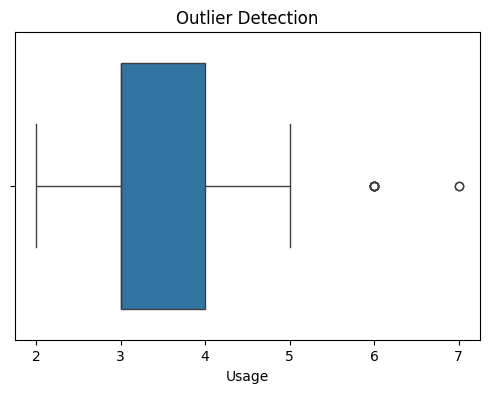

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Usage'],orient= 'h')
plt.title('Outlier Detection')

plt.show()

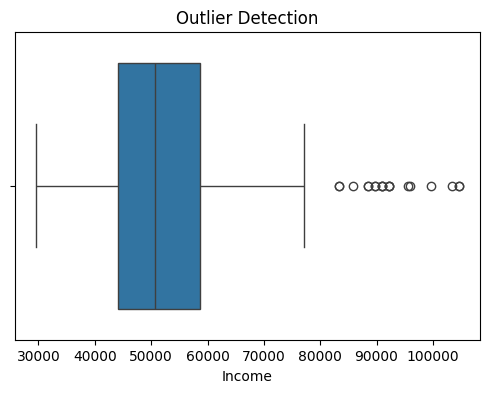

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Income'],orient= 'h')
plt.title('Outlier Detection')

plt.show()

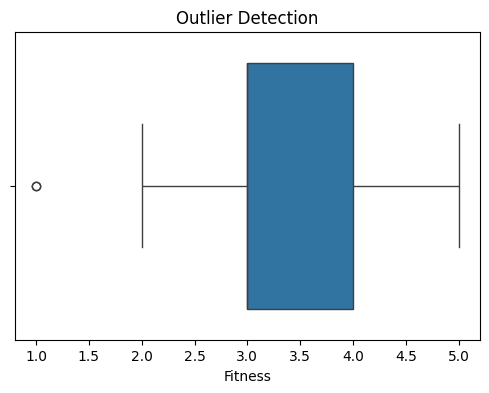

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Fitness'],orient= 'h')
plt.title('Outlier Detection')

plt.show()

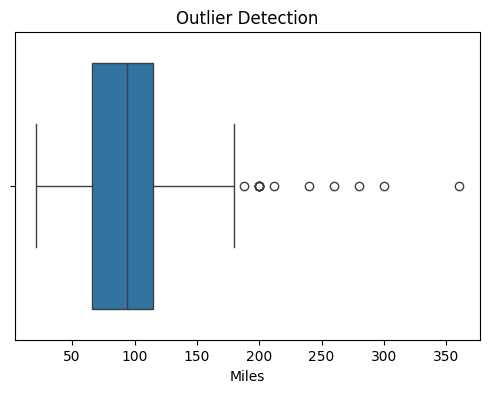

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Miles'],orient= 'h')
plt.title('Outlier Detection')

plt.show()

INSIGHTS: By this boxplots, we understood most of the outliers are in Miles, Income.

In [ ]:
Q1 = df[['Age','Education','Income','Miles']].quantile(0.25)
Q3 = df[['Age','Education','Income','Miles']].quantile(0.75)
IQR = Q3-Q1
outliers_iqr = df[((df[['Age','Education','Income','Miles']] < (Q1-1.5*IQR)) | (df[['Age','Education','Income','Miles']]>(Q3+1.5*IQR))).any(axis=1)]

print('outliers:')
print(outliers_iqr[['Age','Education','Income','Miles']])

outliers:
     Age  Education  Income  Miles
23    24         16   44343    188
78    47         16   56850     94
79    50         16   64809     66
84    21         14   34110    212
139   48         16   57987     64
142   22         18   48556    200
148   24         16   52291    200
152   25         18   61006    200
155   25         18   75946    240
156   25         20   74701    170
157   26         21   69721    100
159   27         16   83416    160
160   27         18   88396    100
161   27         21   90886    100
162   28         18   92131    180
164   28         18   88396    150
166   29         14   85906    300
167   30         16   90886    280
168   30         18  103336    160
169   30         18   99601    150
170   31         16   89641    260
171   33         18   95866    200
172   34         16   92131    150
173   35         16   92131    360
174   38         18  104581    150
175   40         21   83416    200
176   42         18   89641    200
177   45  

In [ ]:
median_values = df[['Age','Education','Income','Miles']].median()

for col in ['Age', 'Education', 'Income', 'Miles']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_whisker = Q1-1.5*IQR
  upper_whisker = Q3+1.5*IQR

  df.loc[(df[col]<lower_whisker) | (df[col]>upper_whisker), col] = median_values[col]


In [ ]:
#instead of removing, replaced the outliers with median values.
df['Income'] = df['Income'].astype('int64')
summary_stat = df.describe(include = 'int64')
summary_stat

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.177778,15.466667,3.455556,3.311111,49275.066667,93.094444
std,6.140947,1.415793,1.084797,0.958869,9390.067933,34.228398
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50312.000000,94.000000
75%,32.250000,16.000000,4.000000,4.000000,53463.250000,106.000000
max,46.000000,18.000000,7.000000,5.000000,77191.000000,180.000000


<Axes: xlabel='Product', ylabel='count'>

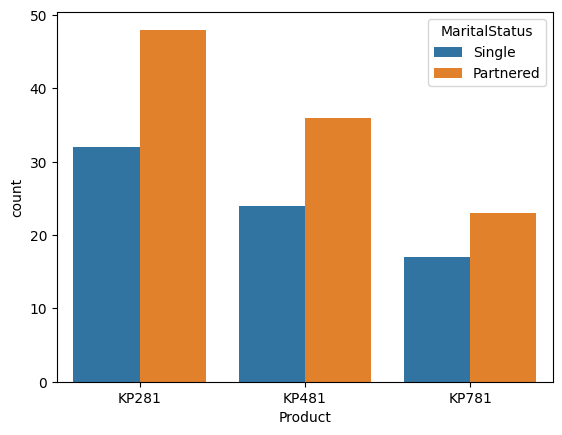

In [ ]:
#Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
sns.countplot(data=df, x='Product', hue='MaritalStatus')


INSIGHTS: By the above countplot understood that Product KP281 has been more purchased by Partnered customers.

<Axes: xlabel='Age', ylabel='count'>

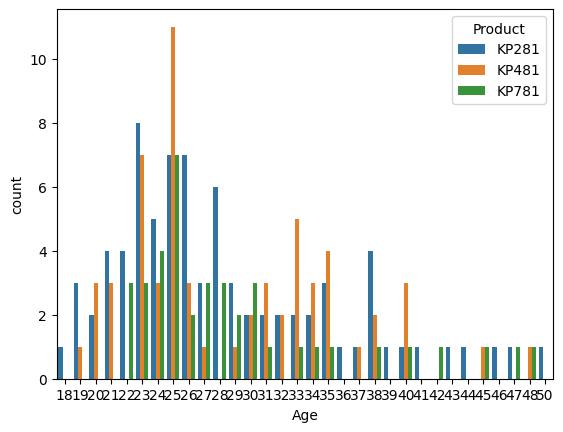

In [ ]:
sns.countplot(data=df, x='Age', hue='Product')


INSIGHTS: Around 50-52years old customers has purchased the product KP481, around 25years old customers has purchased the product KP281 and the age 52-55years KP781.But max was at product KP481 with the age group 50-52years.

<Axes: xlabel='Gender', ylabel='count'>

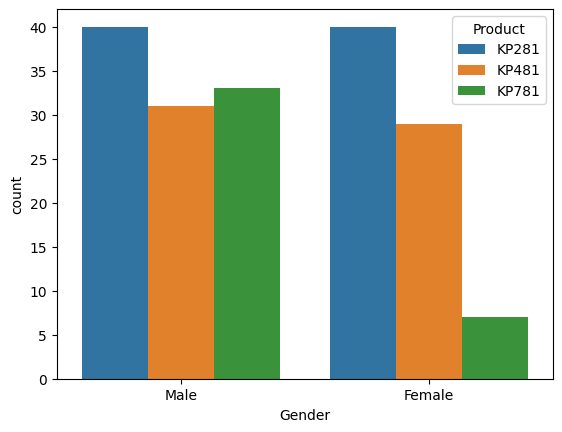

In [ ]:
sns.countplot(data=df, x='Gender', hue='Product')


INSIGHTS: Product KP281 purchased by Male and Female both at major part and Product KP781 has been less purchased by Female compared to the other products.

In [ ]:
#Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
cross_tab = pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],normalize ='index')
cross_tab

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


INSIGHTS: 0.6% of Partnered customers purchased the product KP281 and 0.4% Single customers has purchased the product KP481.

In [ ]:
cross_tab1 = pd.crosstab(index=df['Age'],columns=df['Product'],normalize='index').head()
cross_tab1


Product,KP281,KP481,KP781
Age,,,
18,1.000000,0.000000,0.000000
19,0.750000,0.250000,0.000000
20,0.400000,0.600000,0.000000
21,0.571429,0.428571,0.000000
22,0.571429,0.000000,0.428571


INSIGHTS: By the above code we can observe 18years customers has not purchased products KP481,KP781. and the age 19, 20,21 years customers has not purchased product KP781.

In [ ]:
cross_tab1 = pd.crosstab(index=df['Age'],columns=df['Product'],normalize='index').tail()
cross_tab1


Product,KP281,KP481,KP781
Age,,,
45,0.0,0.5,0.5
46,1.0,0.0,0.0
47,0.5,0.0,0.5
48,0.0,0.5,0.5
50,1.0,0.0,0.0


INSIGHTS: No customer has purchased the product KP281 of age 45 and age 46 has not purchased product KP481, KP781. Majorily product KP481, KP781 has been purchased by 45 age customers.

In [ ]:
cross_tab2 = pd.crosstab(index=df['Product'],columns=df['Gender'],normalize='index')
cross_tab2


Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


INSIGHTS: Product KP281 has purchased by Female and Male with same percentage 5%. Male with 0.825% has purchased the product KP781.

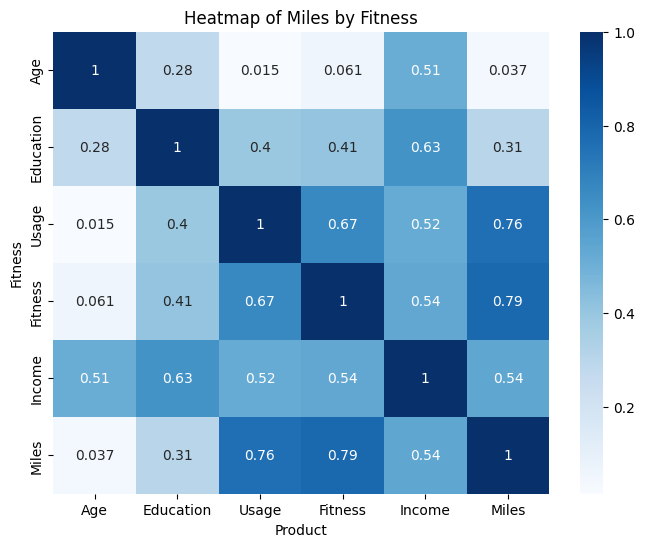

In [ ]:
#Check correlation among different factors using heat maps or pair plots.

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), cmap='Blues',annot = True)
plt.title('Heatmap of Miles by Fitness')
plt.xlabel('Product')
plt.ylabel('Fitness')
plt.show()


INSIGHTS: By heatmap we got max 1% at Miles and in this correlation Product and Fitness max is 1%.

Miles-fitness: highly co-related because the more miles a person walks more fitter they get.

Usage-miles: highly co-realted as more they walk and cover large miles , there is more usage of product.

Fitness-Usage: Moderately co -related with each other, more usage of product will lead to good level of fitness.

Income-fitness: Moderately co -relative the more people earn or generate Income, they invest more in fitness and better food.



In [ ]:
#With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
KP781 = df[df['Product'] == 'KP781']
KP781[['Gender']].value_counts()


Gender
Male      33
Female     7
Name: count, dtype: int64

INSIGHTS: The probability of male customer brought a KP781 treadmill is 0.825.

In [ ]:
#Customer Profiling

KP281 = df[df['Product'] == 'KP281']
KP281[['Gender','MaritalStatus']].value_counts()

Gender  MaritalStatus
Female  Partnered        27
Male    Partnered        21
        Single           19
Female  Single           13
Name: count, dtype: int64

In [ ]:
KP481 = df[df['Product'] == 'KP481']
KP481[['Gender','MaritalStatus']].value_counts()

Gender  MaritalStatus
Male    Partnered        21
Female  Partnered        15
        Single           14
Male    Single           10
Name: count, dtype: int64

In [ ]:
KP781 = df[df['Product'] == 'KP781']
KP781[['Gender','MaritalStatus']].value_counts()

Gender  MaritalStatus
Male    Partnered        19
        Single           14
Female  Partnered         4
        Single            3
Name: count, dtype: int64

INSIGHTS: Product KP281 is mostly preferred by couples especially Female.

Product KP481 is mostly preferred by couples especially male.

Product KP781 is already on the low side in the preference of customers. In general it is preffered less than the other produtcs . Female are least likely to use this product.